# Exploratory Data Analysis on Uninformative Features

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, SparsePCA


import matplotlib.pyplot as plt
import seaborn as sns


In [192]:
## Import Data

# all features scaled (words are one hot encoded)
#scaled = np.load('Data/Bad_Features/ONEHOT_SCALED.npy') 

# only unscaled features without any word features
#no_words = pd.read_csv('Data/Bad_Features/log_onehot_no_words.csv') 
#no_words= no_words.drop(['datetime', 'anomaly'], axis = 1)




## Future: perform PCA on windowed data
#window_size = 10
#windows = []

## Make Windows
#for row in range(scaled.shape[0]-window_size):
#    windows += [scaled[row:row+window_size, :]]

#windows = pd.Series(windows)
#print('Object: ONEHOT_WINDOWS\nSize:', sys.getsizeof(windows)/1000000000, 'GiB')

In [150]:
# First row of scaled. Note column identifiers are removed but there would otherwise be 128 features
scaled[0]

array([8.00000000e-02, 0.00000000e+00, 1.10758587e-01, 1.90128090e-02,
       1.93348801e-04, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [146]:
# Unscaled dataset without message features

no_words.head()

,words_per_event,delta_t,evnts_in_10min,evnts_in_1min,evnts_in_1s,prio_0,prio_1,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8
0,5,0,71880,4074,2,1,0,0,0,0,0,1,0,0,0,0
1,11,0,71879,4073,1,1,0,0,0,0,0,0,0,0,1,0
2,5,1,72054,4201,11,1,0,0,0,0,0,1,0,0,0,0
3,5,0,72053,4200,10,1,0,0,0,0,0,1,0,0,0,0
4,5,0,72052,4199,9,1,0,0,0,0,0,0,1,0,0,0


In [33]:
## Import anomaly labels
anom_labels = pd.read_feather('Data/Checkpoints/labeled_blks.feather')
anom_labels

Object: anom_labels
Size: 943.003212 MiB


,blkID,anomaly
0,blk_-1608999687919862906,0
1,blk_-1608999687919862906,0
2,blk_-1608999687919862906,0
3,blk_-1608999687919862906,0
4,blk_-1608999687919862906,0
...,...,...
11175624,blk_-6171368032583208892,0
11175625,blk_6195025276114316035,0
11175626,blk_-3339773404714332088,0
11175627,blk_1037231945509285002,0


### PCA on every 3000th event on scaled data

No handles with labels found to put in legend.


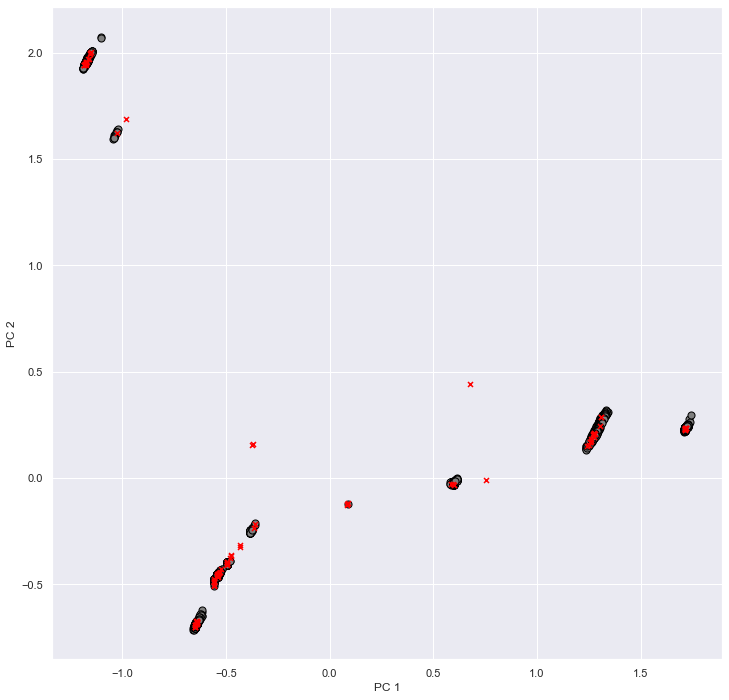

In [166]:
plt.style.use('seaborn-white')
sns.set(rc={'figure.figsize':(12,12)})

step = 3000
ls, rs = 0, 11175628

idx_anom = np.array(anom_labels.anomaly[ls:rs:step], dtype = bool)
idx_norm = np.array(1-idx_anom, dtype = bool)

data_small = scaled[ls:rs:step]
pca = PCA().fit(data_small)
pca_2d = pca.transform(data_small)

plt.scatter(pca_2d[idx_norm, 0], pca_2d[idx_norm, 1], s=50, c='grey', edgecolors='black', marker='o')
plt.scatter(pca_2d[idx_anom, 0], pca_2d[idx_anom, 1], s=25, c='red', edgecolors='black', marker='x')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

plt.savefig('PCA_3000.png', dpi=100)
plt.show()


### Zoomed in PCA on every 2nd event on scaled data

No handles with labels found to put in legend.


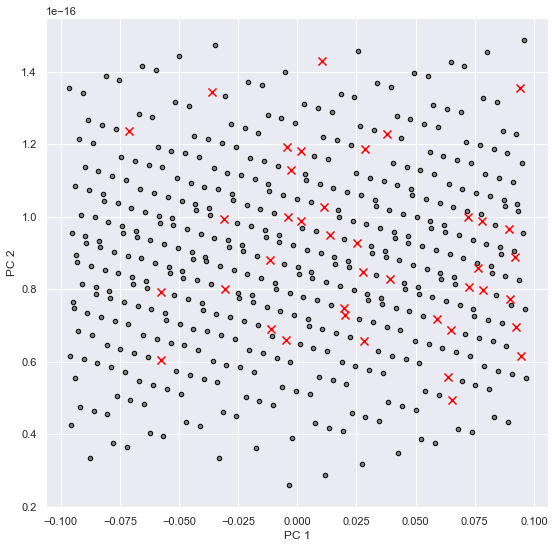

In [157]:
plt.style.use('seaborn-white')
sns.set(rc={'figure.figsize':(9,9)})

step = 2
ls, rs = int(2e6), int(2001000)

idx_anom = np.array(anom_labels.anomaly[ls:rs:step], dtype = bool)
idx_norm = np.array(1-idx_anom, dtype = bool)

data_small = scaled[ls:rs:step]
pca = PCA().fit(data_small)
pca_2d = pca.transform(data_small)

plt.scatter(pca_2d[idx_norm, 0], pca_2d[idx_norm, 1], s=20, c='grey', edgecolors='black', marker='o')
plt.scatter(pca_2d[idx_anom, 0], pca_2d[idx_anom, 1], s=65, c='red', edgecolors='black', marker='x')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

plt.savefig('PCA_zoom_scaled.png', dpi=100)
plt.show()


### SparsePCA on every 1000th event on scaled data

No handles with labels found to put in legend.


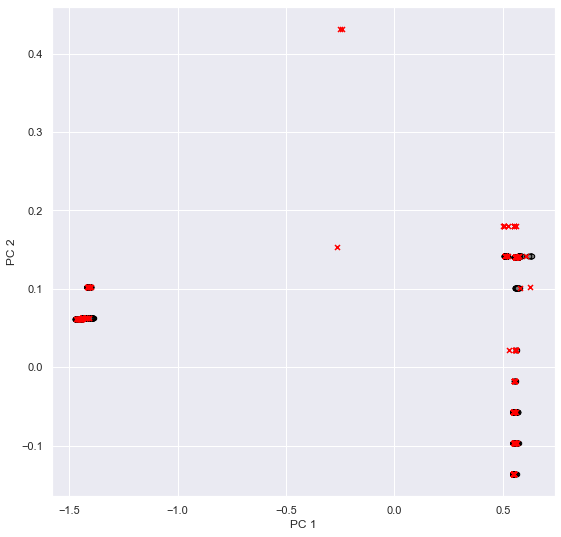

In [159]:
plt.style.use('seaborn-white')
sns.set(rc={'figure.figsize':(9,9)})

step = 1000
ls, rs = int(0e6), int(11e6)

idx_anom = np.array(anom_labels.anomaly[ls:rs:step], dtype = bool)
idx_norm = np.array(1-idx_anom, dtype = bool)

data_small = scaled[ls:rs:step]
pca = SparsePCA().fit(data_small)
pca_2d = pca.transform(data_small)

plt.scatter(pca_2d[idx_norm, 0], pca_2d[idx_norm, 1], s=20, c='grey', edgecolors='black', marker='o')
plt.scatter(pca_2d[idx_anom, 0], pca_2d[idx_anom, 1], s=25, c='red', edgecolors='black', marker='x')


plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

plt.savefig('PCA_sparse.png', dpi=100)
plt.show()


### PCA on every 2000th event on data with no word features

No handles with labels found to put in legend.


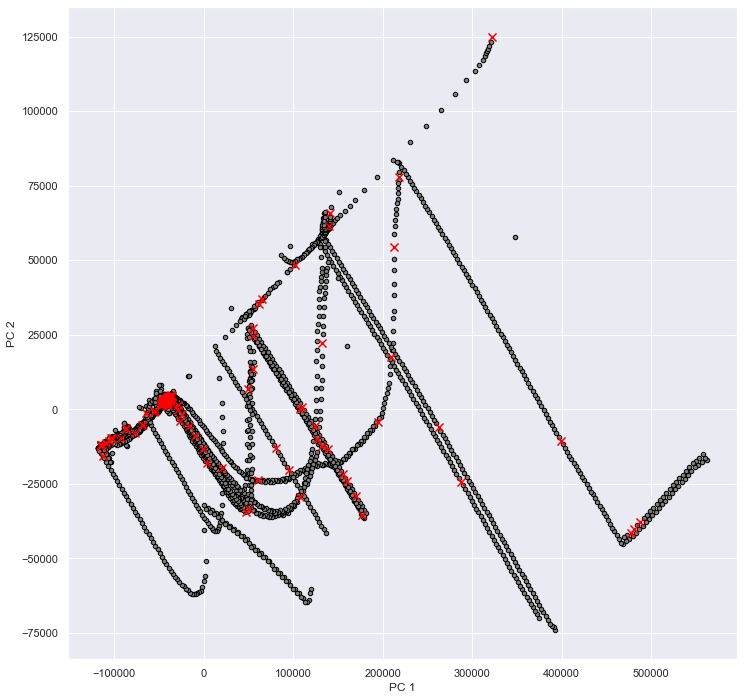

In [167]:
plt.style.use('seaborn-white')
sns.set(rc={'figure.figsize':(12,12)})

step = 2000
ls, rs = 0, 11175628

idx_anom = np.array(anom_labels.anomaly[ls:rs:step], dtype = bool)
idx_norm = np.array(1-idx_anom, dtype = bool)

data_small = no_words[ls:rs:step]
pca = PCA().fit(data_small)
pca_2d = pca.transform(data_small)

plt.scatter(pca_2d[idx_norm, 0], pca_2d[idx_norm, 1], s=20, c='grey', edgecolors='black', marker='o')
plt.scatter(pca_2d[idx_anom, 0], pca_2d[idx_anom, 1], s=65, c='red', edgecolors='black', marker='x')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

plt.savefig('PCA_no_words.png', dpi=100)
plt.show()


### Zoomed PCA on data with no word features

No handles with labels found to put in legend.


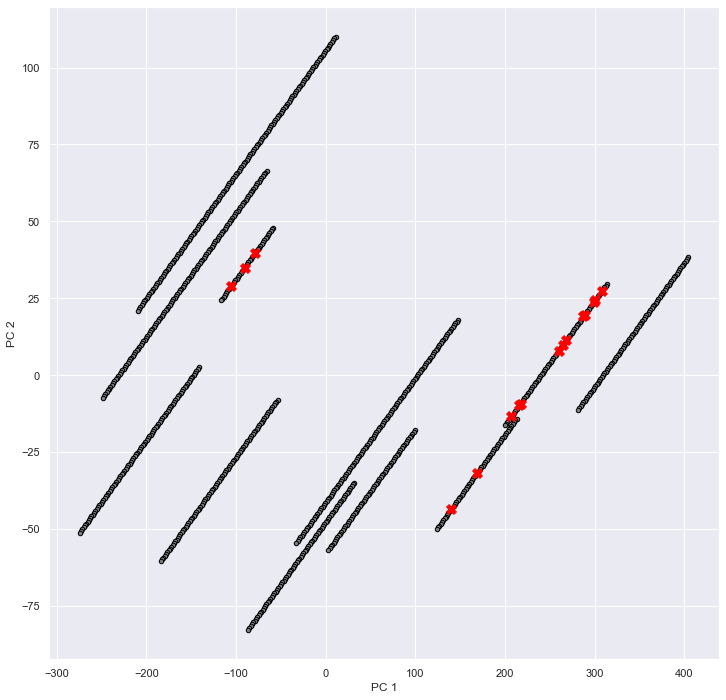

In [179]:
plt.style.use('seaborn-white')
sns.set(rc={'figure.figsize':(12,12)})

step = 1
n = np.random.randint(0, 11600000)
ls, rs = n, n+1000

idx_anom = np.array(anom_labels.anomaly[ls:rs:step], dtype = bool)
idx_norm = np.array(1-idx_anom, dtype = bool)

data_small = no_words[ls:rs:step]
pca = PCA().fit(data_small)
pca_2d = pca.transform(data_small)

plt.scatter(pca_2d[idx_norm, 0], pca_2d[idx_norm, 1], s=20, c='grey', edgecolors='black', marker='o')
plt.scatter(pca_2d[idx_anom, 0], pca_2d[idx_anom, 1], s=95, c='red', edgecolors='red', marker='X')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

plt.savefig('PCA_zoom_nowords.png', dpi=100)
plt.show()

No handles with labels found to put in legend.


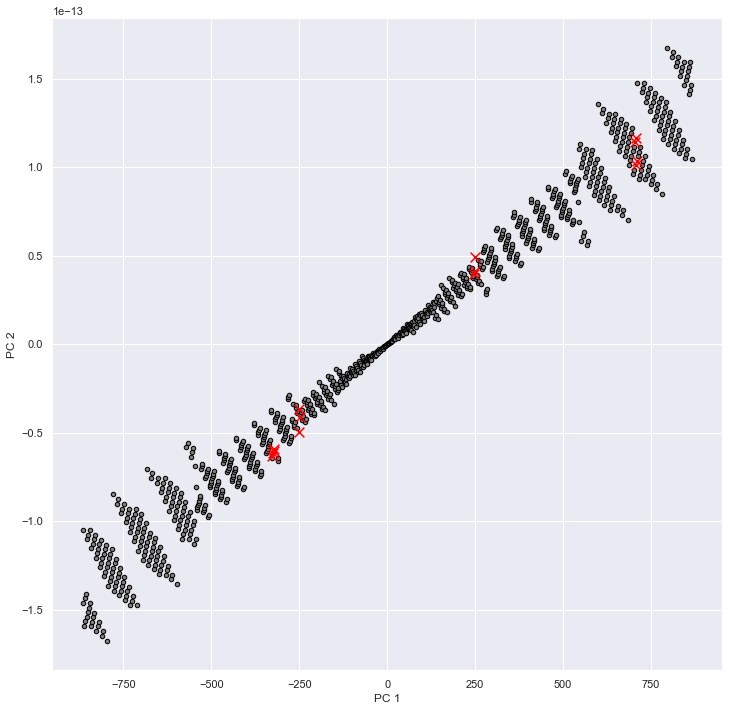

In [183]:
plt.style.use('seaborn-white')
sns.set(rc={'figure.figsize':(12,12)})

step = 1
n = 9178329 #np.random.randint(0, 11600000)
ls, rs = n, n+1000

idx_anom = np.array(anom_labels.anomaly[ls:rs:step], dtype = bool)
idx_norm = np.array(1-idx_anom, dtype = bool)

data_small = no_words[ls:rs:step]
pca = PCA().fit(data_small)
pca_2d = pca.transform(data_small)

plt.scatter(pca_2d[idx_norm, 0], pca_2d[idx_norm, 1], s=20, c='grey', edgecolors='black', marker='o')
plt.scatter(pca_2d[idx_anom, 0], pca_2d[idx_anom, 1], s=95, c='red', edgecolors='black', marker='x')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')

plt.savefig('PCA_zoom_nowords2.png', dpi=100)
plt.show()

## Other curious features
- Event frequencies in time windows
- Time intervals between events
- Words per Event

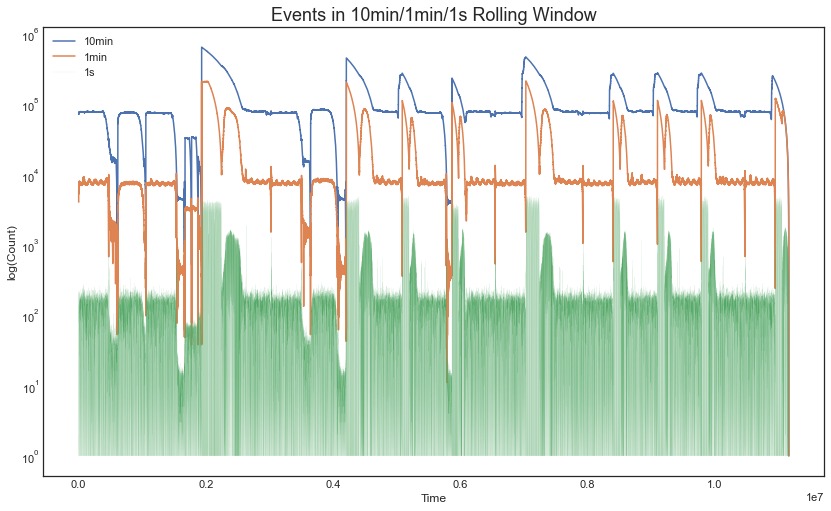

In [184]:
%matplotlib inline
sns.set(rc={'figure.figsize':(14,8.27)})
plt.style.use('seaborn-white')

fig = plt.figure()
ax = plt.axes()

ax.plot(np.array(no_words.evnts_in_10min), label='10min')
ax.plot(np.array(no_words.evnts_in_1min), label='1min')
ax.plot(np.array(no_words.evnts_in_1s), lw=0.06, label='1s')

ax.set_xlabel('Time')
ax.set_yscale('log')
ax.set_ylabel('log(Count)')
ax.set_title('Events in 10min/1min/1s Rolling Window', fontsize=18)
ax.legend()

plt.show()

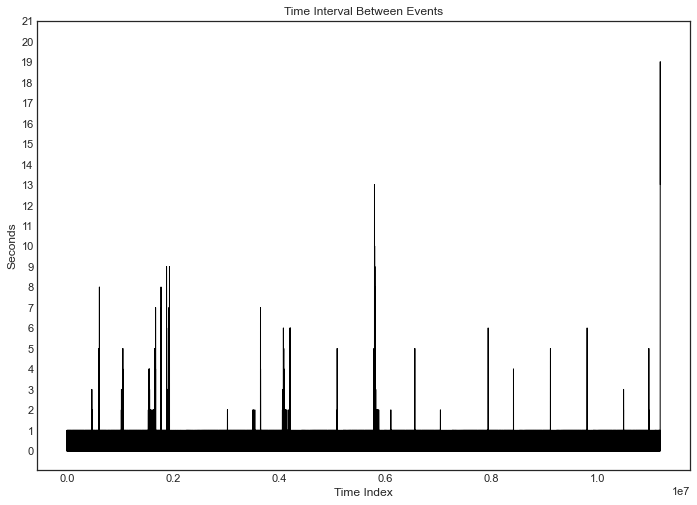

In [186]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('seaborn-white')

fig = plt.figure()
ax = plt.axes()

ax.plot(np.array(no_words.delta_t), c = 'black', lw = 1)
ax.set_yticks(np.arange(0,22,1))

ax.set_xlabel('Time Index')
ax.set_ylabel('Seconds')
ax.set_title('Time Interval Between Events')
plt.show()

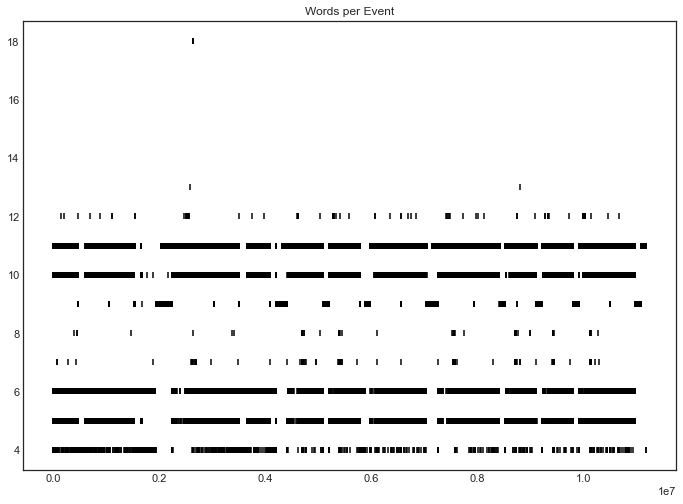

In [191]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('seaborn-white')

fig, ax = plt.subplots()

idx = no_words.index[::100]
ax.scatter(idx, no_words.words_per_event[::100], c = 'black', marker = '|')
ax.set_title('Words per Event')


plt.show()